In [1]:
import pandas as pd
import numpy   as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import zero_one_loss

sns.set_theme()
Dataset = pd.read_csv('Dataset_final.csv')
#Dataset.round(2)
Dataset

,anoNascimento,idDisciplina,idSerie,EscolaridadeResponsavel,idEstadoCivilResponsavel,Total_Faltas,numeroReprovacoes,AprovacoesComExcelencia,Aprovacoes,Diciplina,sexo_int,situacaoDisciplina_inteiro
0,2002,3,49,1.0,2.0,0,100.0,0.000000,0.000000,1,1,1
1,2002,3,49,6.0,2.0,0,100.0,0.000000,0.000000,1,1,1
2,2002,8,49,1.0,2.0,0,100.0,0.000000,0.000000,28,1,1
3,2002,8,49,2.0,2.0,0,100.0,0.000000,0.000000,28,1,1
4,2002,26,49,2.0,2.0,0,100.0,0.000000,0.000000,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
52765,2006,38,50,1.0,2.0,0,0.0,29.411765,58.823529,31,1,10
52766,2006,38,50,7.0,2.0,0,0.0,29.411765,58.823529,31,1,10
52767,2006,59,50,1.0,2.0,0,0.0,29.411765,58.823529,13,1,10
52768,2006,59,50,7.0,2.0,0,0.0,29.411765,58.823529,13,1,10


In [4]:
Dataset = Dataset.dropna()
missing_data = Dataset.isna().sum()
print(missing_data)

anoNascimento                 0
idDisciplina                  0
idSerie                       0
EscolaridadeResponsavel       0
idEstadoCivilResponsavel      0
Total_Faltas                  0
numeroReprovacoes             0
AprovacoesComExcelencia       0
Aprovacoes                    0
Diciplina                     0
sexo_int                      0
situacaoDisciplina_inteiro    0
dtype: int64


**Para Validação Dividimos os Dados:** 
- **treino**,75% 
- **teste**, 25%

In [5]:
from sklearn.model_selection import train_test_split

# Dividindo em treino e teste 85% treino e 15% teste:
D_treino, D_teste = train_test_split(Dataset, test_size=.15, random_state=30) #test_size, por padrão é 25%

# print("D_treino: ", D_treino.shape, dict(D_treino.iloc[:, 0].value_counts()))
# print("D_teste: ", D_teste.shape, dict(D_teste.iloc[:, 0].value_counts()))

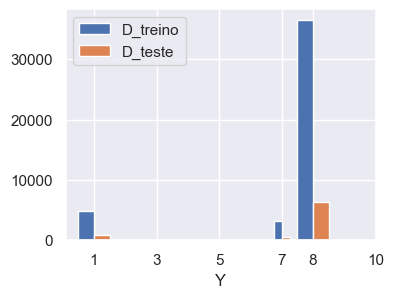

In [28]:
# visualizar as amostras:
plt.figure(figsize=(4,3))
plt.hist([D_treino.iloc[:, -1], D_teste.iloc[:, -1]], bins=[1,3,5,7,8,10], align='left', rwidth=0.5)
plt.legend(['D_treino','D_teste'])
plt.xlabel('Y'), plt.xticks([1,3,5,7,8,10])
plt.show()

In [29]:
# Selecionado os atributos e classes de treino e teste.

X_treino = D_treino.iloc[:, 0:11]
Y_treino = D_treino.iloc[:, -1]
print("D_treino e validação: ", (X_treino.shape, Y_treino.shape))

X_teste = D_teste.iloc[:, 0:11]
Y_teste = D_teste.iloc[:, -1]
print("D_teste: ", (X_teste.shape, Y_teste.shape))


D_treino e validação:  ((44548, 11), (44548,))
D_teste:  ((7862, 11), (7862,))


**Normalização:**

In [8]:
def Normalization(x):
        
    return x/x.abs().max()

In [9]:
X_treino_Normalizado = Normalization(X_treino)
X_teste_Normalizado = Normalization(X_teste)

In [36]:
#Criando o modelo ideal com 400 epocas
from sklearn import neural_network
modelo = neural_network.MLPClassifier(random_state=30, max_iter=400)

In [11]:
def teste(g, D_tst, metrica, **kwds):
    X_tst, y_tst = D_tst
    y_true = y_tst
    y_pred = g.predict(X_tst)
    E_tst = metrica(y_true, y_pred, **kwds)
    
    return E_tst


def validacao(Modelo, D_trn, D_val, metrica, **kwds):
    # Treinamento:
    g = Modelo.fit(*D_trn)
    
    # Teste:
    E_trn = teste(g, D_trn, metrica, **kwds)
    E_val = teste(g, D_val, metrica, **kwds)
    
    return E_trn, E_val

In [21]:
# Dividindo em  dados de treino e validação 15%
X_train, X_val, y_train, y_val = train_test_split(X_treino_Normalizado, Y_treino, test_size=0.15, random_state=30)

In [22]:
#Avaliando o modelo: 
E_trn, E_tst = validacao(modelo, (X_train, y_train), (X_teste_Normalizado, Y_teste), zero_one_loss)
print("Erro de treinamento:", E_trn)
print("Erro de teste :", E_tst)


Erro de treinamento: 0.17176812359698934
Erro de teste : 0.17578224370389217


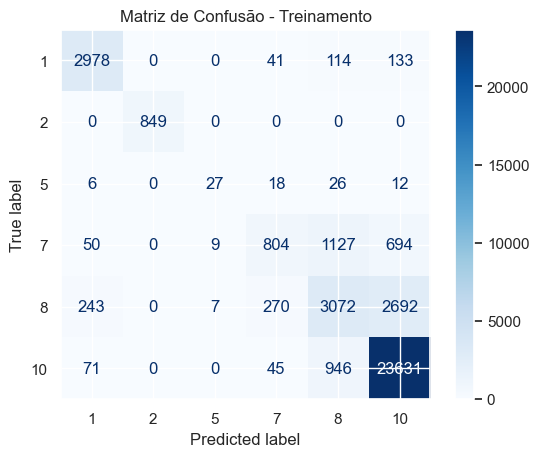

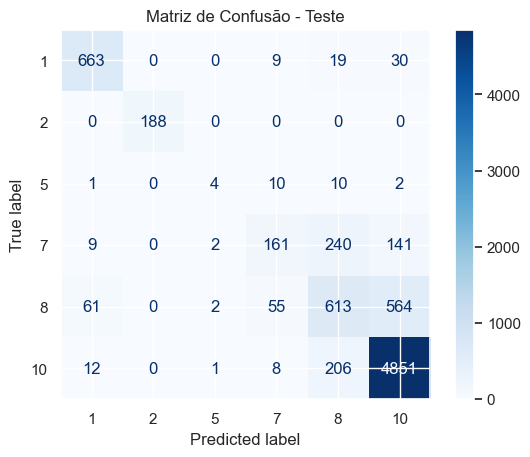

In [23]:
# Plot matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Avaliação modelo  (matriz de confusão)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm_trn, cm_tst = validacao(modelo, (X_train, y_train), (X_teste_Normalizado, Y_teste), confusion_matrix)

# Exiba a matriz de confusão para o conjunto de treinamento
disp_trn = ConfusionMatrixDisplay(confusion_matrix=cm_trn, display_labels=modelo.classes_)
disp_trn.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Treinamento")
plt.show()

# Exiba a matriz de confusão para o conjunto de teste
disp_tst = ConfusionMatrixDisplay(confusion_matrix=cm_tst, display_labels=modelo.classes_)
disp_tst.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Teste")
plt.show()

C:\Users\cajad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\cajad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\cajad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (110) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\cajad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (160) reached and the optimi

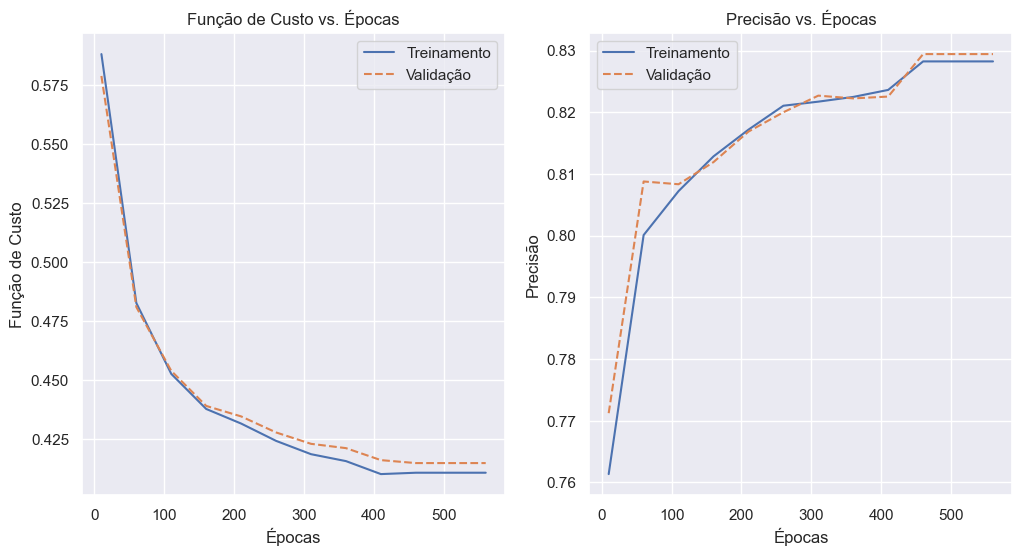

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss

X_train, X_val, y_train, y_val = train_test_split(X_treino_Normalizado, Y_treino, test_size=0.15, random_state=30)

# Definir uma lista de diferentes números de épocas
epocas = list(range(10, 600, 50))

# Métricas
custo_treino = []
custo_validacao = []
precisao_treino = []
precisao_validacao = []

for epoca in epocas:
    # Treinando o modelo
    modelo = MLPClassifier(random_state=30, max_iter=epoca)
    modelo.fit(X_train, y_train)
    
    # Precisão e custo para treinamento
    y_train_pred = modelo.predict_proba(X_train)
    custo_treino.append(log_loss(y_train, y_train_pred))
    precisao_treino.append(modelo.score(X_train, y_train))
    
    # Precisão e custo para validação
    y_val_pred = modelo.predict_proba(X_val)
    custo_validacao.append(log_loss(y_val, y_val_pred))
    precisao_validacao.append(modelo.score(X_val, y_val))

plt.figure(figsize=(12, 6))

# Plotar função de custo
plt.subplot(1, 2, 1)
plt.plot(epocas, custo_treino, label='Treinamento')
plt.plot(epocas, custo_validacao, label='Validação', linestyle='--')
plt.xlabel('Épocas')
plt.ylabel('Função de Custo')
plt.title('Função de Custo vs. Épocas')
plt.legend()

# Plotar precisão
plt.subplot(1, 2, 2)
plt.plot(epocas, precisao_treino, label='Treinamento')
plt.plot(epocas, precisao_validacao, label='Validação', linestyle='--' )
plt.xlabel('Épocas')
plt.ylabel('Precisão')
plt.title('Precisão vs. Épocas')
plt.legend()

plt.show()


In [16]:
# Avaliação modelo  (relatório de classificação)

from sklearn.metrics import classification_report

cr_trn, cr_tst = validacao(modelo, (X_train, y_train), (X_teste_Normalizado, Y_teste),
                            classification_report)
print("treino:\n", cr_trn)
print("teste :\n", cr_tst)

treino:
               precision    recall  f1-score   support

           1       0.89      0.91      0.90      3266
           2       1.00      1.00      1.00       849
           5       0.63      0.30      0.41        89
           7       0.68      0.30      0.42      2684
           8       0.58      0.49      0.53      6284
          10       0.87      0.96      0.91     24693

    accuracy                           0.83     37865
   macro avg       0.78      0.66      0.69     37865
weighted avg       0.81      0.83      0.81     37865

teste :
               precision    recall  f1-score   support

           1       0.89      0.92      0.90       721
           2       1.00      1.00      1.00       188
           5       0.44      0.15      0.22        27
           7       0.66      0.29      0.40       553
           8       0.56      0.47      0.51      1295
          10       0.87      0.96      0.91      5078

    accuracy                           0.82      7862
   ma

NameError: name 'history' is not defined

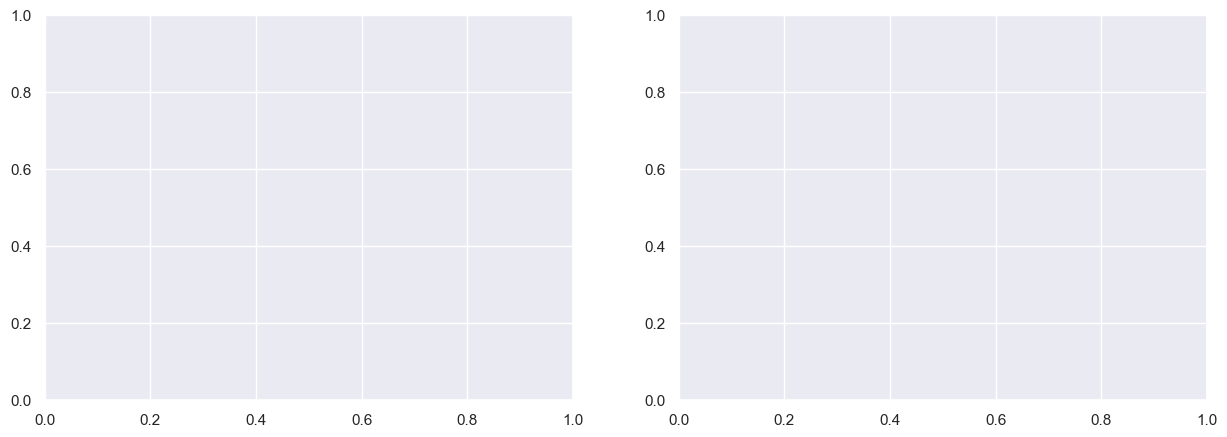

In [17]:
# plot history:
fig, (ax1, ax2) = plt.subplots(1 ,2, figsize=(15,5))

epochs = range(1, len(history['loss']) + 1)

ax1.plot(epochs, history['loss'], 'm', label='Treinamento')
ax1.plot(epochs, history['val_loss'], 'r--', label='Validação')
ax1.set_xlabel('Épocas')
ax1.set_ylabel('Perda')
ax1.legend()

ax2.plot(epochs, history['accuracy'], 'c', label='Treinamento')
ax2.plot(epochs, history['val_accuracy'], 'b--', label='Validação')
ax2.set_xlabel('Épocas')
ax2.set_ylabel('Acurácia')
ax2.legend()

plt.show()

In [18]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Criando o modelo...
model = Sequential()
model.add(Dense(2, activation='sigmoid', input_dim=30))  # Camada oculta com 10 neurônios
model.add(Dense(1, activation='sigmoid'))  # Camada de saída com 1 neurônio (sigmoid) temos:

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


ModuleNotFoundError: No module named 'keras'

In [19]:
# com validação:
history = model.fit(
    X_train, y_train, epochs=1000, batch_size=1,
    validation_data=(X_val, y_val)
).history

NameError: name 'model' is not defined

In [20]:
#Para 400 epocas
from sklearn.neural_network import MLPClassifier
modelo_ideal = MLPClassifier(random_state=30, max_iter=400)
modelo_ideal.fit(X_train, y_train)

C:\Users\cajad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=400, random_state=30)

In [ ]:
# Avaliação modelo  (relatório de classificação)

from sklearn.metrics import classification_report

cr_trn, cr_tst = validacao(modelo_ideal, (X_train, y_train), (X_teste_Normalizado, Y_teste),
                            classification_report)
print("treino:\n", cr_trn)
print("teste :\n", cr_tst)